## Import and call needed libraries:

In [1]:
import numpy as np
import pandas as pd
import tweepy
import requests
import seaborn as sns
from scipy import stats
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering from different sources:
#### 1.importing (twitter-archive-enhanced.csv): 


In [2]:
archive_df=pd.read_csv('twitter-archive-enhanced.csv')
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
57,881268444196462592,NaN,NaN,2017-07-01 21:49:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,None,None,None,None
1310,707038192327901184,NaN,NaN,2016-03-08 03:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707038192...,10,10,Kathmandu,None,None,None,None
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,None,None,None,None
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None


#### 2. import data for image prediction data:

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image-predictions.tsv' 
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)
image_df= pd.read_csv('image-predictions.tsv', sep='\t')
image_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1365,761599872357261312,https://pbs.twimg.com/media/CpG_CrlWYAYyuP3.jpg,1,Gordon_setter,0.240427,True,Saluki,0.224269,True,Doberman,0.129730,True
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
1743,822859134160621569,https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg,1,malinois,0.332897,True,Chihuahua,0.104116,True,Staffordshire_bullterrier,0.047745,True


#### 3. tweet_ json.text file data gathering:

In [4]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'xxxxxxNOxxxxxxxxxx'
consumer_secret = 'xxxxxxNOxxxxxxxxxx'
access_token = 'xxxxxxNOxxxxxxxxxx'
access_secret = 'xxxxxxNOxxxxxxxxxx'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [5]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append(tweet)
df_list[:3]

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [6]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        followers_count = tweet['user']['followers_count']
        retweeted = tweet['retweeted']
        df_list.append({'tweet_id':tweet_id, 'retweet_count': retweet_count,'favorite_count': fav_count,
                       'followers_count': followers_count,'retweeted': retweeted
                       })
        
api_df = pd.DataFrame(df_list)
api_df.sample(5)


,tweet_id,retweet_count,favorite_count,followers_count,retweeted
68,879050749262655488,4203,20828,8867125,False
1047,740214038584557568,1918,6547,8867129,False
252,842163532590374912,5613,23935,8867127,False
1670,681281657291280384,1072,3152,8867130,False
90,874434818259525634,13028,0,8867125,False


## data assessing  for each data frame:

### "we are going to check some quality and tidness issues in "arhive_df,image_df & api_df" to extract some pure data to analyze"

### 1. twitter-archive-enhanced:



In [7]:
archive_df.info()
archive_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
archive_df[archive_df.rating_denominator!= 10].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [9]:
archive_df.name.value_counts().head(20)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
an           7
Bailey       7
Daisy        7
Buddy        7
Milo         6
Jack         6
Name: name, dtype: int64

In [10]:
wrong_name =[]                            ##### #investigate lower case names if it seems wrong names
for name in archive_df.name:
    if name.islower():
        wrong_name.append(name)
print(len(wrong_name))
print(wrong_name)

109
['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [11]:
archive_df.tweet_id.duplicated().sum()

0

### Quality issues:

#####    - time_stamp column need to be date time dtype.
#####    - remove zone from time_stamp +0000
#####    - tweet_id need to be in string format 
#####    -rating_numerator need to be in float  dtype
#####    -rating_denominator need to be in float dtype
#####    - drop tweet_id not matched with image_prediction table
#####    - need to investigate below or above 10   rating_denominator
#####    - 'name' column need investgation for the extracted names from text column 
#####    -drop rows ' expanded_urls' with null values
#####    -drop retweets with not null values
#####    -drop replies with not null values

### Tidiness issues:
##### - need to create new column called "dog_stage" to define the each dog stage as (doggo, floofer, pupper, and puppo)
##### -need to drop columns: in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id	,retweeted_status_user_id,	retweeted_status_timestamp as no meaningful usage for them in my analysis

### 2. image prediction data table:

In [12]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
image_df.shape

(2075, 12)

In [15]:
sum(image_df.jpg_url.duplicated())

66

-------------------------------------------------------------------------------------------------

## *image prediction data table:

### Quality issues:

####  - tweet_id need to be in string dtype
#####  delete duplicated images in JPEG URLs

### tidiness issues:

### *image prediction data table:
#### 1.  P(1,2,3)_dog which may be prediction only , p(1,2,3)_conf may be confidence only as example

--------------------------------------------------------------------------------------------------

### 3. Twitter JSON table

In [16]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_count    2331 non-null   int64
 2   favorite_count   2331 non-null   int64
 3   followers_count  2331 non-null   int64
 4   retweeted        2331 non-null   bool 
dtypes: bool(1), int64(4)
memory usage: 75.2 KB


In [17]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,2643.294723,7426.478764,8.867134e+06
std,6.823170e+16,4470.219260,11531.614982,5.706977e+01
min,6.660209e+17,1.000000,0.000000,8.867125e+06
25%,6.782670e+17,536.000000,1291.500000,8.867128e+06
50%,7.182469e+17,1236.000000,3225.000000,8.867129e+06
75%,7.986692e+17,3066.000000,9086.500000,8.867130e+06
max,8.924206e+17,75958.000000,153307.000000,8.867766e+06


## *twitter JSON table:

### Quality issues:

####  - tweet_id need to be in string dtype
####  -  retweet_count	,favorite_count	,followers_count need to be integer



----------------------------------------------------------------------


## Cleaning process:


In [18]:
archive_clean=archive_df.copy()
image_clean=image_df.copy()
api_clean=api_df.copy()

### 1. twitter-archive-enhanced:

#### now i will clean each element in quality issues which we had find 

In [19]:
archive_clean.timestamp=pd.to_datetime(archive_clean.timestamp)
archive_clean['timestamp']=archive_clean['timestamp'].dt.tz_localize(None)             #change timestamp column dtype to datetime and remove UTC from df

In [20]:
archive_clean.timestamp.sample()      

562   2016-11-26 19:50:26
Name: timestamp, dtype: datetime64[ns]

In [21]:
archive_clean['tweet_id']=archive_clean.tweet_id.astype(object)                        #convert tweet_id to string

In [22]:
archive_clean.tweet_id.sample()      

2082    670815497391357952
Name: tweet_id, dtype: object

In [23]:
archive_clean['rating_numerator']=archive_clean.rating_numerator.astype(float)         #convert rating_numerator to float

In [24]:
archive_clean.rating_numerator.sample()

1762    10.0
Name: rating_numerator, dtype: float64

In [25]:
archive_clean['rating_denominator']=archive_clean.rating_denominator.astype(float)         #convert rating_denominator to float

In [26]:
archive_clean.rating_denominator.sample()        

1217    10.0
Name: rating_denominator, dtype: float64

In [27]:
# from archive dataset to extract the tweets that include data in the retweet_status_id.
retweet_num = archive_clean.retweeted_status_id.notnull()
archive_clean[retweet_num].shape[0]

181

In [28]:
archive_clean = archive_clean[~retweet_num]        #drop retweets

In [29]:
reply_num = archive_clean.in_reply_to_status_id.notnull() #Filter all rows in in_reply_to_status_id which is not null
archive_clean[reply_num].shape[0]                       #checking total number of replies

78

In [30]:
archive_clean = archive_clean[~reply_num]            #drop all replies

In [31]:
expanded_URL_num = archive_clean.expanded_urls.isnull() #Filter all rows in expanded url which is  null
archive_clean[expanded_URL_num].shape[0]                       #checking total number of null URLs

3

In [32]:
archive_clean = archive_clean[~expanded_URL_num]           #drop empty URLs

In [33]:
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)        #remove in_reply_to_status_id
#archive_clean.drop('in_reply_to_user_id',axis=1,inplace=True)          #remove in_reply_to_user_id
#archive_clean.drop('retweeted_status_id',axis=1,inplace=True)          #remove retweeted_status_id
#archive_clean.drop('retweeted_status_user_id',axis=1,inplace=True)     #remove retweeted_status_user_id
#archive_clean.drop('retweeted_status_timestamp',axis=1,inplace=True)   #remove retweeted_status_timestamp

In [34]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,a,None,None,pupper,None
518,810657578271330305,2016-12-19 01:26:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,https://twitter.com/dog_rates/status/810657578...,11.0,10.0,Pavlov,None,None,None,None
1518,690932576555528194,2016-01-23 16:22:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's testing out the water. Suc...,https://twitter.com/dog_rates/status/690932576...,12.0,10.0,Buddy,None,None,None,None
1891,674764817387900928,2015-12-10 01:37:23,"<a href=""http://twitter.com/download/iphone"" r...",These two pups are masters of camouflage. Very...,https://twitter.com/dog_rates/status/674764817...,10.0,10.0,None,None,None,None,None
1203,716285507865542656,2016-04-02 15:25:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephanus. She stays woke. 12/10 https...,https://twitter.com/dog_rates/status/716285507...,12.0,10.0,Stephanus,None,None,None,None


In [35]:
#### - Investigating rating issues for 10 < denominator < 10
archive_clean.loc[archive_clean.rating_denominator != 10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0
902,758467244762497024,Why does this never happen at my front door......,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45.0,50.0


In [36]:
#### - Investigating rating issues for 10 < numenator < 10
archive_clean.loc[archive_clean.rating_numerator != 10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0
...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9.0,10.0
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.0,10.0


In [37]:
archive_clean.rating_numerator.value_counts(dropna=False)

12.0      485
10.0      434
11.0      413
13.0      287
9.0       153
8.0        98
7.0        52
14.0       38
5.0        34
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
24.0        1
27.0        1
84.0        1
0.0         1
420.0       1
75.0        1
80.0        1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
121.0       1
99.0        1
204.0       1
1776.0      1
45.0        1
165.0       1
50.0        1
Name: rating_numerator, dtype: int64

In [38]:
# Create a new column called dog rating to avoid the issue of iamges which contain more than 1 dog and denominator is 10*number of dogs
archive_clean['dog_rating'] = archive_clean['rating_numerator']*10 / archive_clean['rating_denominator']
archive_clean[archive_clean.dog_rating>15]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None,34.285714
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None,75.000000
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None,27.000000
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,None,None,None,1776.000000
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None,26.000000
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,None,None,None,None,420.000000


In [39]:
archive_clean[archive_clean.dog_rating>15]        #check abnormal ratings


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None,34.285714
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None,75.000000
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None,27.000000
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,None,None,None,1776.000000
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None,26.000000
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,None,None,None,None,420.000000


In [40]:
archive_clean.drop([516,695,763,979,1712,2074],axis=0,inplace=True) # remove outliers from dataset

In [41]:
archive_clean[archive_clean.dog_rating>15]        #test the code

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating


In [42]:
archive_clean[archive_clean.rating_numerator>20].expanded_urls

433     https://twitter.com/dog_rates/status/820690176...
902     https://twitter.com/dog_rates/status/758467244...
1120    https://twitter.com/dog_rates/status/731156023...
1202    https://twitter.com/dog_rates/status/716439118...
1228    https://twitter.com/dog_rates/status/713900603...
1254    https://twitter.com/dog_rates/status/710658690...
1274    https://twitter.com/dog_rates/status/709198395...
1351    https://twitter.com/dog_rates/status/704054845...
1433    https://twitter.com/dog_rates/status/697463031...
1635    https://twitter.com/dog_rates/status/684222868...
1779    https://twitter.com/dog_rates/status/677716515...
1843    https://twitter.com/dog_rates/status/675853064...
Name: expanded_urls, dtype: object

In [43]:
archive_clean.drop([433,902,1120,1202,1228,1254,1274,1351,1433,1635,1779,1843],axis=0,inplace=True) #remove 'page doesn't exist URLs' '

In [44]:
archive_clean[archive_clean.rating_numerator>20].expanded_urls       #test the code

Series([], Name: expanded_urls, dtype: object)

In [45]:
#archive_clean.name.value_counts(dropna=False)

In [46]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():  
    try:
        if row['name'] == "a":
            correct_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('a', correct_name)
        elif row['name'] == 'an':
            correct_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('an', correct_name)
    except IndexError:
        archive_clean.loc[index,'name'] = np.nan

            
archive_clean.name.value_counts(dropna = False)

None       589
NaN         39
Charlie     11
Lucy        11
Cooper      10
          ... 
Jaycob       1
Ralphé       1
Jersey       1
Zara         1
Kendall      1
Name: name, Length: 969, dtype: int64

In [47]:
archive_clean['name'] = archive_clean['name'].str.replace('None','no_dog_name', regex=True)
#archive_clean['name'] = archive_clean['name'].str.replace(np.nan,'no_dog_name', regex=True)

In [48]:
archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating
592,798933969379225600,2016-11-16 17:01:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Iroh. He's in a predicament. 12/10 som...,https://twitter.com/dog_rates/status/798933969...,12.0,10.0,Iroh,None,None,None,None,12.0
2047,671518598289059840,2015-12-01 02:38:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,https://twitter.com/dog_rates/status/671518598...,9.0,10.0,Scruffers,None,None,None,None,9.0
1858,675501075957489664,2015-12-12 02:23:01,"<a href=""http://twitter.com/download/iphone"" r...","I shall call him squishy and he shall be mine,...",https://twitter.com/dog_rates/status/675501075...,13.0,10.0,no_dog_name,None,None,None,None,13.0
711,784517518371221505,2016-10-07 22:15:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,https://twitter.com/dog_rates/status/784517518...,11.0,10.0,Frankie,None,None,None,None,11.0
178,857263160327368704,2017-04-26 16:00:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,https://twitter.com/dog_rates/status/857263160...,13.0,10.0,Oscar,None,None,None,None,13.0
1906,674468880899788800,2015-12-09 06:01:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He thinks he's flying. 13/10 th...,https://twitter.com/dog_rates/status/674468880...,13.0,10.0,Louis,None,None,None,None,13.0
762,778039087836069888,2016-09-20 01:12:28,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,https://twitter.com/dog_rates/status/778039087...,12.0,10.0,no_dog_name,None,None,pupper,None,12.0
1653,683462770029932544,2016-01-03 01:39:57,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",https://twitter.com/dog_rates/status/683462770...,8.0,10.0,no_dog_name,None,None,pupper,None,8.0
1677,682059653698686977,2015-12-30 04:44:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Tess. Her main passions are shelves an...,https://twitter.com/dog_rates/status/682059653...,11.0,10.0,Tess,None,None,None,None,11.0
1621,684926975086034944,2016-01-07 02:38:10,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bruiser &amp; Charlie. They are the best ...,https://twitter.com/dog_rates/status/684926975...,11.0,10.0,Bruiser,None,None,None,None,11.0


#### ceating dog_stage colum and remove values from colums headers

In [49]:
(archive_clean.loc[:,'doggo':'puppo'] != 'None') .sum()

doggo       83
floofer     10
pupper     228
puppo       24
dtype: int64

In [50]:
none_unique_stage = archive_clean[(archive_clean['doggo'] != 'None') & (archive_clean['pupper'] != 'None')]

In [51]:
none_unique_stage.iloc[:, -4:].sample(3)

,floofer,pupper,puppo,dog_rating
1063,None,pupper,None,12.0
1113,None,pupper,None,12.0
889,None,pupper,None,12.0


In [52]:
archive_clean['doggo']=archive_clean.doggo.str.replace('None','')
archive_clean['floofer']=archive_clean.floofer.str.replace('None','')
archive_clean['pupper']=archive_clean.pupper.str.replace('None','')
archive_clean['puppo']=archive_clean.puppo.str.replace('None','')

In [53]:
archive_clean['dog_stage']=archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo'] #create new column called dog_breed_name
archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)                                              #drop dog columns and combine it in dog_stage

##### test

#### - Change combined dog_stage and seperate them with '_'

In [54]:
archive_clean['dog_stage']=archive_clean.dog_stage.str.replace('doggopuppo','doggo-puppo')
archive_clean['dog_stage']=archive_clean.dog_stage.str.replace('doggofloofer','doggo-floofer')
archive_clean['dog_stage']=archive_clean.dog_stage.str.replace('doggopupper','doggo-pupper')
archive_clean['dog_stage']=archive_clean.dog_stage.replace(r'^\s*$', np.nan, regex=True)

In [55]:
archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_rating,dog_stage
1888,674781762103414784,2015-12-10 02:44:43,"<a href=""http://twitter.com/download/iphone"" r...",Bedazzled pup here. Fashionable af. Super yell...,https://twitter.com/dog_rates/status/674781762...,8.0,10.0,no_dog_name,8.0,NaN
520,810254108431155201,2016-12-17 22:43:27,"<a href=""http://twitter.com/download/iphone"" r...","This is Gus. He likes to be close to you, whic...",https://twitter.com/dog_rates/status/810254108...,12.0,10.0,Gus,12.0,NaN
1718,680176173301628928,2015-12-25 00:00:11,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,https://twitter.com/dog_rates/status/680176173...,10.0,10.0,no_dog_name,10.0,pupper
1748,679062614270468097,2015-12-21 22:15:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,https://twitter.com/dog_rates/status/679062614...,11.0,10.0,Chompsky,11.0,NaN
2210,668620235289837568,2015-11-23 02:41:01,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kallie. There was a tornado in th...,https://twitter.com/dog_rates/status/668620235...,10.0,10.0,Kallie,10.0,NaN
1099,735991953473572864,2016-05-27 00:32:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's curly af. Also rather f...,https://twitter.com/dog_rates/status/735991953...,11.0,10.0,Maxaroni,11.0,NaN
2283,667200525029539841,2015-11-19 04:39:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,https://twitter.com/dog_rates/status/667200525...,11.0,10.0,Joshwa,11.0,NaN
737,780858289093574656,2016-09-27 19:54:58,"<a href=""http://twitter.com/download/iphone"" r...","This is Dash. He's very stylish, but also incr...",https://twitter.com/dog_rates/status/780858289...,10.0,10.0,Dash,10.0,NaN
2170,669351434509529089,2015-11-25 03:06:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,https://twitter.com/dog_rates/status/669351434...,10.0,10.0,Sully,10.0,NaN
853,765371061932261376,2016-08-16 02:14:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,https://twitter.com/dog_rates/status/765371061...,11.0,10.0,Louie,11.0,pupper


### -Test

In [56]:
archive_clean.dog_stage.value_counts(dropna=False)

NaN              1742
pupper            219
doggo              72
puppo              23
doggo-pupper        9
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2076 non-null   object        
 1   timestamp           2076 non-null   datetime64[ns]
 2   source              2076 non-null   object        
 3   text                2076 non-null   object        
 4   expanded_urls       2076 non-null   object        
 5   rating_numerator    2076 non-null   float64       
 6   rating_denominator  2076 non-null   float64       
 7   name                2037 non-null   object        
 8   dog_rating          2076 non-null   float64       
 9   dog_stage           334 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 258.4+ KB


In [58]:
archive_clean.to_csv('twitter-archive-enhanced-clean.csv',index=False)

#### 2. image prediction cleaning:

In [59]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [60]:
image_clean['tweet_id']=image_clean.tweet_id.astype(object)   #change tweet_id to string

In [61]:
image_clean.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [62]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### i will change columns names to understandable columns

In [63]:
columns_name = ['tweet_id', 'jpg_url', 'img_num', 'pred_1', 'conf_1', 'breed_1','pred_2', 'conf_2', 'breed_2',
       'pred_3', 'conf_3', 'breed_3']
image_clean.columns = columns_name               #renaming the columns 
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'pred_1', 'conf_1', 'breed_1',
       'pred_2', 'conf_2', 'breed_2', 'pred_3', 'conf_3', 'breed_3'],
      dtype='object')

In [64]:
#test = pd.wide_to_long(image_clean, stubnames=['prediction', 'confidence', 'breed'], i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

In [65]:
sum(image_clean['jpg_url'].duplicated())  #test

66

In [66]:
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last') #deleting duplicated images
sum(image_clean.jpg_url.duplicated())

0

In [67]:
# now try to find True breed
breed = []
confidence = []

#create a function to capture the dog type and confidence level from the first 'True' prediction
def image(image_clean):
    if image_clean['breed_1'] == True:
        breed.append(image_clean['pred_1'])
        confidence.append(image_clean['conf_1'])
    elif image_clean['breed_2'] == True:
        breed.append(image_clean['pred_2'])
        confidence.append(image_clean['conf_2'])
    elif image_clean['breed_3'] == True:
        breed.append(image_clean['pred_3'])
        confidence.append(image_clean['conf_3'])
    else:
        breed.append('Error')
        confidence.append('Error')

#series objects having index the image_prediction_clean column.        
image_clean.apply(image, axis=1)

#create new columns
image_clean['dog_breed'] = breed
image_clean['confidence'] = confidence

In [68]:
image_clean.sample(10)

,tweet_id,jpg_url,img_num,pred_1,conf_1,breed_1,pred_2,conf_2,breed_2,pred_3,conf_3,breed_3,dog_breed,confidence
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False,Error,Error
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True,Labrador_retriever,0.213673
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1,chow,0.335761,True,Samoyed,0.167173,True,kuvasz,0.145715,True,chow,0.335761
1339,758474966123810816,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,1,Pembroke,0.546145,True,Cardigan,0.244200,True,German_shepherd,0.100429,True,Pembroke,0.546145
810,692187005137076224,https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg,2,Siberian_husky,0.810592,True,malamute,0.119745,True,Eskimo_dog,0.029265,True,Siberian_husky,0.810592
1313,754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,rotisserie,0.471493,False,cash_machine,0.250837,False,sliding_door,0.117872,False,Error,Error
1008,709207347839836162,https://pbs.twimg.com/media/CdecUSzUIAAHCvg.jpg,1,Chihuahua,0.948323,True,Italian_greyhound,0.017730,True,quilt,0.016688,False,Chihuahua,0.948323
64,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True,giant_schnauzer,0.841265
711,685315239903100929,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,2,chow,0.470162,True,Pomeranian,0.159677,True,Eskimo_dog,0.105074,True,chow,0.470162
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False,Error,Error


In [69]:
#drop rows that has conf and breed =error:
image_clean = image_clean[image_clean['dog_breed'] != 'Error']

In [70]:
image_clean['dog_breed'].value_counts(dropna=False)

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      63
                       ... 
EntleBucher               1
Bouvier_des_Flandres      1
clumber                   1
standard_schnauzer        1
Scotch_terrier            1
Name: dog_breed, Length: 113, dtype: int64

In [71]:
image_clean.head()

,tweet_id,jpg_url,img_num,pred_1,conf_1,breed_1,pred_2,conf_2,breed_2,pred_3,conf_3,breed_3,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [72]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'pred_1', 'conf_1', 'breed_1',
       'pred_2', 'conf_2', 'breed_2', 'pred_3', 'conf_3', 'breed_3',
       'dog_breed', 'confidence'],
      dtype='object')

In [73]:
image_clean.drop(['pred_1', 'conf_1', 'breed_1','img_num',
       'pred_2', 'conf_2', 'breed_2', 'pred_3', 'conf_3', 'breed_3'],axis=1,inplace=True)        #remove in_reply_to_status_id

In [74]:
image_clean.info()
image_clean.sample(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1691 non-null   object
 1   jpg_url     1691 non-null   object
 2   dog_breed   1691 non-null   object
 3   confidence  1691 non-null   object
dtypes: object(4)
memory usage: 66.1+ KB


,tweet_id,jpg_url,dog_breed,confidence
283,671138694582165504,https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg,Samoyed,0.587342


In [75]:
image_clean.to_csv('image-predictions-clean.tsv',index=False)

#### 3.cleaning data for tweet_json.text

In [96]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   object
 1   retweet_count    2331 non-null   int64 
 2   favorite_count   2331 non-null   int64 
 3   followers_count  2331 non-null   int64 
 4   retweeted        2331 non-null   bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 75.2+ KB


In [77]:
api_clean.retweeted.value_counts(dropna=False)  #check if there is retweets in the list

False    2331
Name: retweeted, dtype: int64

In [78]:
api_clean['tweet_id']=api_clean.tweet_id.astype(object)   #change tweet_id to string

In [79]:
api_clean.info()
api_clean.sample(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   object
 1   retweet_count    2331 non-null   int64 
 2   favorite_count   2331 non-null   int64 
 3   followers_count  2331 non-null   int64 
 4   retweeted        2331 non-null   bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 75.2+ KB


,tweet_id,retweet_count,favorite_count,followers_count,retweeted
1221,711732680602345472,3976,8602,8867130,False


In [80]:
api_clean.to_csv('tweet_json_clean.txt',index=False)

In [81]:
archive_api_master = pd.merge(archive_clean, api_clean, on='tweet_id')
archive_api_master.info()                      #create master dataset for twitter archive file and Json text

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2069 non-null   object        
 1   timestamp           2069 non-null   datetime64[ns]
 2   source              2069 non-null   object        
 3   text                2069 non-null   object        
 4   expanded_urls       2069 non-null   object        
 5   rating_numerator    2069 non-null   float64       
 6   rating_denominator  2069 non-null   float64       
 7   name                2030 non-null   object        
 8   dog_rating          2069 non-null   float64       
 9   dog_stage           333 non-null    object        
 10  retweet_count       2069 non-null   int64         
 11  favorite_count      2069 non-null   int64         
 12  followers_count     2069 non-null   int64         
 13  retweeted           2069 non-null   bool        

## --Storing , insights and visualization:

In [97]:
archive_api_master.sample(2)  

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_rating,dog_stage,retweet_count,favorite_count,followers_count,retweeted
1476,679511351870550016,2015-12-23 03:58:25,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to William. He makes fun of others b...,https://twitter.com/dog_rates/status/679511351...,7.0,10.0,William,7.0,NaN,1225,3269,8867130,False
897,729463711119904772,2016-05-09 00:11:16,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pupcasso. You can't afford his art. 13/10...,https://twitter.com/dog_rates/status/729463711...,13.0,10.0,Pupcasso,13.0,NaN,2251,5644,8867130,False


### creating master data frame for all data sets:

In [98]:
twitter_master = pd.merge(archive_api_master, image_clean, how = 'left', on = ['tweet_id'])
twitter_master.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_rating,dog_stage,retweet_count,favorite_count,followers_count,retweeted,jpg_url,dog_breed,confidence
177,849776966551130114,2017-04-06 00:13:11,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,https://twitter.com/dog_rates/status/849776966...,12.0,10.0,no_dog_name,12.0,NaN,7279,29446,8867126,False,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,Chihuahua,0.292092


In [84]:
twitter_master['confidence']=twitter_master.confidence.astype(float)

In [99]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2069 non-null   object        
 1   timestamp           2069 non-null   datetime64[ns]
 2   source              2069 non-null   object        
 3   text                2069 non-null   object        
 4   expanded_urls       2069 non-null   object        
 5   rating_numerator    2069 non-null   float64       
 6   rating_denominator  2069 non-null   float64       
 7   name                2030 non-null   object        
 8   dog_rating          2069 non-null   float64       
 9   dog_stage           333 non-null    object        
 10  retweet_count       2069 non-null   int64         
 11  favorite_count      2069 non-null   int64         
 12  followers_count     2069 non-null   int64         
 13  retweeted           2069 non-null   bool        

In [86]:
twitter_master = twitter_master[twitter_master['jpg_url'].notnull()] #removing tweets without images from master
twitter_master=twitter_master.drop(columns=['expanded_urls','rating_numerator','rating_denominator']) #remove not need columns

### Insight number 1: 
#### breed of dog "bedlington terrior" is the highest  favorite dog breed from users

In [87]:
breed_mean_favourite = twitter_master.groupby(['dog_breed']).favorite_count.mean().sort_values(ascending=False)[10::-1]
breed_mean_favourite

dog_breed
Border_terrier             12260.428571
whippet                    13277.000000
Leonberg                   13347.333333
English_springer           13484.000000
Irish_water_spaniel        14708.000000
flat-coated_retriever      15226.375000
black-and-tan_coonhound    15397.000000
Bouvier_des_Flandres       16174.000000
French_bulldog             16973.931034
Saluki                     21853.750000
Bedlington_terrier         22726.666667
Name: favorite_count, dtype: float64

### Visualization number 1

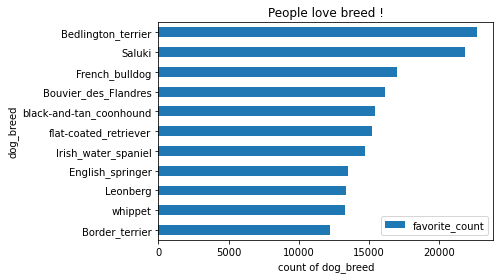

In [88]:
breed_mean_favourite.plot(kind='barh',title='People love breed !',legend=True)
plt.xlabel('count of dog_breed',fontsize=10) 
plt.ylabel('dog_breed',fontsize=10)
plt.legend()
plt.savefig('visualization1.png')

### Insight number 2: 
#### breed of dog "komondor" is the highest  predicted dog breed 

In [89]:
dog_breed_prediction = twitter_master.groupby(['dog_breed']).confidence.mean().sort_values(ascending=False)[10::-1]

In [90]:
dog_breed_prediction

dog_breed
black-and-tan_coonhound    0.692000
German_shepherd            0.694426
Blenheim_spaniel           0.699588
Pomeranian                 0.705332
Samoyed                    0.728503
Tibetan_mastiff            0.737021
Bernese_mountain_dog       0.766685
Brittany_spaniel           0.775591
bull_mastiff               0.815618
keeshond                   0.844431
komondor                   0.972531
Name: confidence, dtype: float64

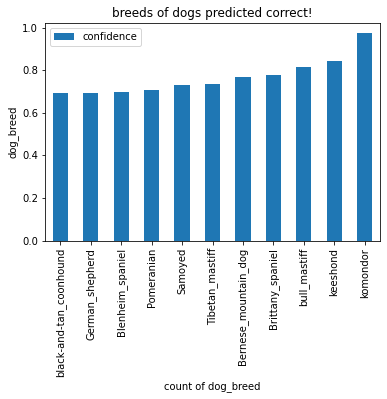

<Figure size 432x288 with 0 Axes>

In [91]:
dog_breed_prediction.plot(kind='bar',title='breeds of dogs predicted correct!',stacked=True)
plt.xlabel('count of dog_breed',fontsize=10) 
plt.ylabel('dog_breed',fontsize=10)
plt.legend()
plt.show()
plt.savefig('visualization2.png')

### Insight number 3: 
#### doggo-puppo is the highest  top rated dog type 

In [92]:
dog_stage_rating=twitter_master.groupby(['dog_stage']).dog_rating.mean().sort_values(ascending=False)[10::-1]

In [93]:
dog_stage_rating

dog_stage
doggo-pupper     10.800000
pupper           10.839506
doggo-floofer    11.000000
doggo            11.862745
puppo            11.950000
floofer          12.000000
doggo-puppo      13.000000
Name: dog_rating, dtype: float64

### Visualization 3

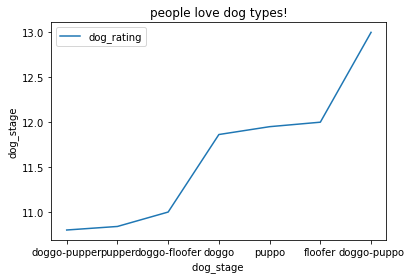

In [94]:
dog_stage_rating.plot(kind = 'line',title='people love dog types!',legend=True)
plt.xlabel('dog_stage ',fontsize=10) 
plt.ylabel('dog_stage',fontsize=10)
plt.legend();
plt.savefig('visualization3.png')

In [95]:
twitter_master.to_csv('twitter-archive-master.csv')